In [124]:
# Import
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# from fastai.structured import add_datepart

# Linear Regression
from sklearn.linear_model import LogisticRegression

# Data Collecting

In [125]:
# Config
symbl = 'MSFT'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch Historical Data
# df = pd.read_csv('https://www.alphavantage.co/query?datatype=csv&function=TIME_SERIES_MONTHLY&symbol=' + symbl + '&outputsize=compact&apikey=' + apiKey)

# Use local data
df = pd.read_csv('data/monthly_MSFT.csv')

# Setting index as date
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')
df.index = df['timestamp']

print

<function print>

# Data Overview

In [126]:
# Get general statistics
df.describe()

,open,high,low,close,volume
count,256.000000,256.000000,256.000000,256.000000,2.560000e+02
mean,49.753136,53.349432,46.189302,49.653671,9.900380e+08
std,29.927316,33.005746,26.658620,29.682854,4.361976e+08
min,16.035000,18.880000,14.870000,16.150000,2.155232e+08
25%,27.235000,28.215000,25.855000,27.117425,6.457838e+08
50%,36.160000,37.695000,32.740000,36.205000,9.474929e+08
75%,64.358750,69.947500,60.617500,64.320000,1.301201e+09
max,175.440000,180.380000,143.980000,175.000000,3.044579e+09


In [127]:
# Get data types
df.dtypes

timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [128]:
# Check top 10 rows
df.head(10)

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2019-05-14,2019-05-14,130.530,130.650,123.0400,124.73,285095390
2019-04-30,2019-04-30,118.950,131.370,118.1000,130.60,433157868
2019-03-29,2019-03-29,112.890,120.820,108.8000,117.94,589045341
2019-02-28,2019-02-28,103.775,113.240,102.3500,112.03,469095970
2019-01-31,2019-01-31,99.550,107.900,97.2000,104.43,714204787
2018-12-31,2018-12-31,113.000,113.420,93.9600,101.57,944287635
2018-11-30,2018-11-30,107.050,112.240,99.3528,110.89,720228643
2018-10-31,2018-10-31,114.750,116.180,100.1100,106.81,927547942
2018-09-28,2018-09-28,110.850,115.290,107.2300,114.37,480255674


In [129]:
# Check last 10 rows
df.tail(10)

,timestamp,open,high,low,close,volume
timestamp,,,,,,
1998-11-30,1998-11-30,106.37,130.27,104.75,122.00,290676700
1998-10-30,1998-10-30,108.06,110.12,87.75,105.87,410762300
1998-09-30,1998-09-30,95.25,114.62,94.50,110.06,298081100
1998-08-31,1998-08-31,109.12,113.75,95.75,95.94,337509900
1998-07-31,1998-07-31,109.12,119.62,105.37,109.94,307324500
1998-06-30,1998-06-30,83.87,108.56,83.12,108.37,308288100
1998-05-29,1998-05-29,90.19,91.00,81.87,84.81,273845600
1998-04-30,1998-04-30,89.81,99.12,86.62,90.12,254744300
1998-03-31,1998-03-31,85.87,90.94,79.25,89.50,274981900


## Convert closing price to trading action

In [130]:
# Expected Return
# expectedReturn = 0 # Long if the stock price stays the same or increases
expectedReturn = 0.025 # Long if the stock price increases by 2.5%

df['prev_close'] = df['close'].shift(-1)

df['action'] = np.nan 

for i, row in df.iterrows():
    realReturn = (df.loc[i, 'close'] / df.loc[i, 'prev_close']) - 1
    df.loc[i, 'action'] = 1 if (realReturn >= expectedReturn) else 0 # 1 = Long / 0 = Short


df.head(10)

,timestamp,open,high,low,close,volume,prev_close,action
timestamp,,,,,,,,
2019-05-14,2019-05-14,130.530,130.650,123.0400,124.73,285095390,130.60,0.0
2019-04-30,2019-04-30,118.950,131.370,118.1000,130.60,433157868,117.94,1.0
2019-03-29,2019-03-29,112.890,120.820,108.8000,117.94,589045341,112.03,1.0
2019-02-28,2019-02-28,103.775,113.240,102.3500,112.03,469095970,104.43,1.0
2019-01-31,2019-01-31,99.550,107.900,97.2000,104.43,714204787,101.57,1.0
2018-12-31,2018-12-31,113.000,113.420,93.9600,101.57,944287635,110.89,0.0
2018-11-30,2018-11-30,107.050,112.240,99.3528,110.89,720228643,106.81,1.0
2018-10-31,2018-10-31,114.750,116.180,100.1100,106.81,927547942,114.37,0.0
2018-09-28,2018-09-28,110.850,115.290,107.2300,114.37,480255674,112.33,0.0


## Prepare data to merge with sentimental analysis

In [131]:
cropped_df = df[(df['timestamp'].dt.year >= 2000)]

In [132]:
cropped_df.tail(10)

,timestamp,open,high,low,close,volume,prev_close,action
timestamp,,,,,,,,
2000-10-31,2000-10-31,60.50,70.12,48.44,68.87,1234707800,60.31,1.0
2000-09-29,2000-09-29,70.00,72.06,58.63,60.31,712766900,69.81,0.0
2000-08-31,2000-08-31,69.94,74.87,68.12,69.81,609699900,69.81,0.0
2000-07-31,2000-07-31,79.69,82.87,67.25,69.81,617092900,80.00,0.0
2000-06-30,2000-06-30,64.37,82.19,63.81,80.00,733525100,62.56,1.0
2000-05-31,2000-05-31,72.87,74.00,60.38,62.56,672215400,69.75,0.0
2000-04-28,2000-04-28,94.44,96.50,65.00,69.75,1129073300,106.25,0.0
2000-03-31,2000-03-31,89.62,115.00,88.94,106.25,1014093800,89.37,1.0
2000-02-29,2000-02-29,98.50,110.00,88.12,89.37,667243800,97.87,0.0


In [133]:
cropped_df = cropped_df.reset_index(drop=True)
# Drop last row
cropped_df = cropped_df[:-1]

In [134]:
cropped_df.tail(5)

,timestamp,open,high,low,close,volume,prev_close,action
227,2000-06-30,64.37,82.19,63.81,80.00,733525100,62.56,1.0
228,2000-05-31,72.87,74.00,60.38,62.56,672215400,69.75,0.0
229,2000-04-28,94.44,96.50,65.00,69.75,1129073300,106.25,0.0
230,2000-03-31,89.62,115.00,88.94,106.25,1014093800,89.37,1.0
231,2000-02-29,98.50,110.00,88.12,89.37,667243800,97.87,0.0


In [135]:
news_data = pd.read_csv("data/sentimental_data.csv")

In [136]:
news_data.head(10)

,year,month,positive
0,2000,1,0.541624
1,2000,2,0.537205
2,2000,3,0.537788
3,2000,4,0.536477
4,2000,5,0.541516
5,2000,6,0.532644
6,2000,7,0.537956
7,2000,8,0.539437
8,2000,9,0.535648
9,2000,10,0.534441


In [137]:
news_data.tail(10)

,year,month,positive
223,2018,8,0.565977
224,2018,9,0.553506
225,2018,10,0.548968
226,2018,11,0.552921
227,2018,12,0.561755
228,2019,1,0.548660
229,2019,2,0.556610
230,2019,3,0.562695
231,2019,4,0.544137
232,2019,5,0.543147


In [138]:
news_data = news_data[::-1].reset_index().drop(columns=['index'])

In [139]:
news_data.head(10)

,year,month,positive
0,2019,5,0.543147
1,2019,4,0.544137
2,2019,3,0.562695
3,2019,2,0.556610
4,2019,1,0.548660
5,2018,12,0.561755
6,2018,11,0.552921
7,2018,10,0.548968
8,2018,9,0.553506
9,2018,8,0.565977


In [140]:
#Drop first row
news_data = news_data[1:]

In [141]:
news_data = news_data.reset_index()

In [142]:
# Combine two datasets
sentimental_df = pd.concat([cropped_df, news_data], axis=1, join_axes=[cropped_df.index])

In [143]:
sentimental_df.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,index,year,month,positive
0,2019-05-14,130.530,130.65,123.04,124.73,285095390,130.60,0.0,1,2019,4,0.544137
1,2019-04-30,118.950,131.37,118.10,130.60,433157868,117.94,1.0,2,2019,3,0.562695
2,2019-03-29,112.890,120.82,108.80,117.94,589045341,112.03,1.0,3,2019,2,0.556610
3,2019-02-28,103.775,113.24,102.35,112.03,469095970,104.43,1.0,4,2019,1,0.548660
4,2019-01-31,99.550,107.90,97.20,104.43,714204787,101.57,1.0,5,2018,12,0.561755


In [144]:
# Similarly for the second file
news_data2 = pd.read_csv("data/sentimental_data2.csv")
news_data2 = news_data2[::-1].reset_index().drop(columns=['index'])
news_data2 = news_data2[1:].reset_index()
sentimental_df = pd.concat([sentimental_df, news_data2], axis=1, join_axes=[sentimental_df.index])
sentimental_df.head(5)

,timestamp,open,high,low,close,volume,prev_close,action,index,year,month,positive,index,year,month,appearance,positive2
0,2019-05-14,130.530,130.65,123.04,124.73,285095390,130.60,0.0,1,2019,4,0.544137,1,2019,4,3,0.666667
1,2019-04-30,118.950,131.37,118.10,130.60,433157868,117.94,1.0,2,2019,3,0.562695,2,2019,3,4,0.500000
2,2019-03-29,112.890,120.82,108.80,117.94,589045341,112.03,1.0,3,2019,2,0.556610,3,2019,2,2,0.500000
3,2019-02-28,103.775,113.24,102.35,112.03,469095970,104.43,1.0,4,2019,1,0.548660,4,2019,1,9,0.500000
4,2019-01-31,99.550,107.90,97.20,104.43,714204787,101.57,1.0,5,2018,12,0.561755,5,2018,12,0,0.000000


In [145]:
sma_df = sentimental_df.drop(columns = ['open','high','low','close','prev_close','year','month','volume','index'])
sma_df.head(5)

,timestamp,action,positive,appearance,positive2
0,2019-05-14,0.0,0.544137,3,0.666667
1,2019-04-30,1.0,0.562695,4,0.500000
2,2019-03-29,1.0,0.556610,2,0.500000
3,2019-02-28,1.0,0.548660,9,0.500000
4,2019-01-31,1.0,0.561755,0,0.000000


## Add STOCH indicator

In [146]:
symbl = 'MSFT'
apiKey = 'MSXSR0YHC991CZN6'

# Fetch SMA Data
stoch = pd.read_csv('https://www.alphavantage.co/query?function=STOCH&symbol=' + symbl + '&interval=monthly&time_period=10&series_type=open&apikey=' + apiKey + '&datatype=csv')


In [147]:
# Drop the first row and reset index
stoch = stoch[1:].reset_index()

In [148]:
all_data = pd.concat([sma_df, stoch], axis=1, join_axes=[sma_df.index])
all_data.head(5)

,timestamp,action,positive,appearance,positive2,index,time,SlowD,SlowK
0,2019-05-14,0.0,0.544137,3,0.666667,1,2019-04-30,72.1060,89.5142
1,2019-04-30,1.0,0.562695,4,0.500000,2,2019-03-29,59.1869,72.5735
2,2019-03-29,1.0,0.556610,2,0.500000,3,2019-02-28,52.2875,54.2304
3,2019-02-28,1.0,0.548660,9,0.500000,4,2019-01-31,58.3607,50.7567
4,2019-01-31,1.0,0.561755,0,0.000000,5,2018-12-31,68.6283,51.8754


In [149]:
# Drop abundant timestamp and index columns
all_data = all_data.drop(columns = ['index','time'])
all_data.head(5)

,timestamp,action,positive,appearance,positive2,SlowD,SlowK
0,2019-05-14,0.0,0.544137,3,0.666667,72.1060,89.5142
1,2019-04-30,1.0,0.562695,4,0.500000,59.1869,72.5735
2,2019-03-29,1.0,0.556610,2,0.500000,52.2875,54.2304
3,2019-02-28,1.0,0.548660,9,0.500000,58.3607,50.7567
4,2019-01-31,1.0,0.561755,0,0.000000,68.6283,51.8754


## Find correlation

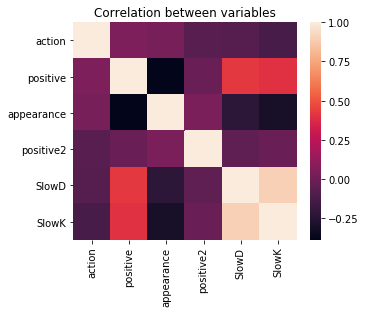

In [150]:
corr = all_data.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Logistic Regression

In [151]:
from sklearn.model_selection import train_test_split

all_data['timestamp'] = pd.to_datetime(all_data['timestamp'], format='%Y-%m-%d')
all_data.index = all_data['timestamp']

feature_cols = ['positive', 'appearance', 'positive2', 'SlowD', 'SlowK']
# feature_cols = ['positive2']
target = 'action'
X = all_data[feature_cols]
y = all_data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_conf=logreg.decision_function(X_test)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [152]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result

,test,pred,conf
timestamp,,,
2010-07-30,1.0,1.0,0.169064
2012-12-31,0.0,1.0,0.230926


In [153]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6595744680851063
Precision: 0.5
Recall: 0.0625


In [154]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[30,  1],
       [15,  1]])

Text(0.5, 257.44, 'Predicted')

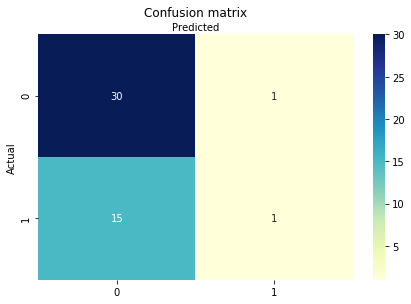

In [155]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Support Vector Machine (SVM)

In [156]:
from sklearn import svm

# Initiate model
svc = svm.SVC(kernel='rbf')

# Fit model
svc.fit(X_train, y_train)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [157]:
y_pred=svc.predict(X_test)
y_conf=svc.decision_function(X_test)

In [158]:
result = pd.DataFrame({ 'test': y_test, 'pred': y_pred, 'conf': y_conf }, columns=['test','pred','conf'])
result = result[result['pred'] == 1.0]
result

,test,pred,conf
timestamp,,,
2011-11-30,0.0,1.0,0.127471


In [159]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6382978723404256
Precision: 0.0
Recall: 0.0


In [160]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[30,  1],
       [16,  0]])

Text(0.5, 257.44, 'Predicted')

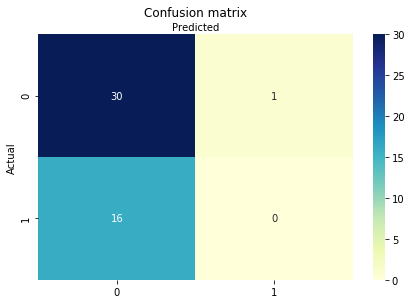

In [161]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Keras Sequential

In [1540]:
!pip install keras

In [162]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/thupham/anaconda3/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [163]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(5,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [192]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
185/185 [==============================] - 1s 4ms/step - loss: 0.5880 - acc: 0.7135
Epoch 2/20
185/185 [==============================] - 0s 2ms/step - loss: 0.5857 - acc: 0.6919
Epoch 3/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5816 - acc: 0.7027
Epoch 4/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5820 - acc: 0.7081
Epoch 5/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5818 - acc: 0.7081
Epoch 6/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5800 - acc: 0.6919
Epoch 7/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5780 - acc: 0.7081
Epoch 8/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5775 - acc: 0.6973
Epoch 9/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5785 - acc: 0.7135
Epoch 10/20
185/185 [==============================] - 0s 1ms/step - loss: 0.5739 - acc: 0.7081
Epoch 11/20
185/185 [============================

In [193]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [195]:
# Precision 
precision_score(y_test, y_pred)

0.35714285714285715

In [196]:
# Recall
recall_score(y_test, y_pred)

0.3125

In [197]:
# F1 score
f1_score(y_test,y_pred)

0.3333333333333333

In [198]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
mse_value

0.7332900775239822

In [199]:
accuracy_score(y_test, y_pred)

0.574468085106383

Text(0.5, 257.44, 'Predicted')

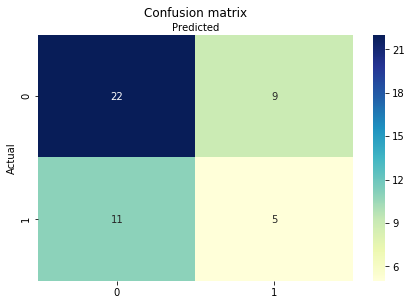

In [200]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')